In [133]:
#!pip install xlrd
#!pip install uncertainties


In [134]:
import pandas as pd
import numpy as np
from uncertainties import unumpy as unp
from uncertainties import ufloat
from uncertainties.umath import *
import math
import scipy as sc
import matplotlib.pyplot as plt
from scipy import optimize
from numpy import arange


VisLuft = ufloat(1.81*10**(-5), 0)
DichteLuft = ufloat(1.29, 0)
DichteOel = ufloat(875, 0)
dKondensator = ufloat(6*10**(-3), 0)
elementarLadung = 1.6*10**(-19)
bigSkalenEinheit = 0.5*10**(-3)
g = ufloat(9.81, 0)
p = 0.94822
uncertainty_Spannung = 2
uncertainty_Strecke = 0.05
uncertainty_tFall = 0.2
uncertainty_tSteig = 0.2

df = pd.read_excel('millikanData.xlsx')

In [135]:
c1 = df.values
c1 = np.delete(c1, [0,1,2,3,4,9,10,11,12], 1)
unc_array = np.array([[uncertainty_Spannung, uncertainty_Strecke, uncertainty_tFall, uncertainty_tSteig]])

c1 = unp.uarray(c1, unc_array)

print(c1)

[[560.0+/-2.0 0.5+/-0.05 4.544+/-0.2 10.42+/-0.2]
 [560.0+/-2.0 0.5+/-0.05 7.803+/-0.2 3.575+/-0.2]
 [560.0+/-2.0 0.5+/-0.05 3.935+/-0.2 2.092+/-0.2]
 [560.0+/-2.0 0.5+/-0.05 8.02+/-0.2 3.753+/-0.2]
 [560.0+/-2.0 0.5+/-0.05 7.264+/-0.2 5.516+/-0.2]
 [560.0+/-2.0 0.5+/-0.05 20.918+/-0.2 1.519+/-0.2]
 [560.0+/-2.0 0.5+/-0.05 8.58+/-0.2 3.526+/-0.2]
 [560.0+/-2.0 0.5+/-0.05 5.786+/-0.2 5.307+/-0.2]
 [510.0+/-2.0 0.5+/-0.05 9.683+/-0.2 2.599+/-0.2]
 [510.0+/-2.0 0.5+/-0.05 6.77+/-0.2 5.775+/-0.2]
 [510.0+/-2.0 0.5+/-0.05 4.776+/-0.2 6.758+/-0.2]
 [510.0+/-2.0 0.5+/-0.05 7.706+/-0.2 3.02+/-0.2]
 [510.0+/-2.0 0.5+/-0.05 9.282+/-0.2 3.584+/-0.2]
 [510.0+/-2.0 0.5+/-0.05 8.46+/-0.2 4.794+/-0.2]
 [510.0+/-2.0 0.5+/-0.05 12.171+/-0.2 3.109+/-0.2]
 [510.0+/-2.0 0.5+/-0.05 3.16+/-0.2 8.384+/-0.2]
 [533.0+/-2.0 0.5+/-0.05 11.363+/-0.2 3.177+/-0.2]
 [533.0+/-2.0 0.5+/-0.05 11.334+/-0.2 3.726+/-0.2]
 [533.0+/-2.0 0.5+/-0.05 6.701+/-0.2 1.354+/-0.2]
 [533.0+/-2.0 0.5+/-0.05 6.978+/-0.2 5.042+/-0.2]
 [

In [136]:
#add vFall to array index 4
append_c1 = np.array([])
for i in range(len(c1)):
  append_c1 = np.append(append_c1, c1[i,1]*bigSkalenEinheit/c1[i,2])

c1 = np.concatenate((c1,append_c1[:,None]),axis=1)

#add vSteig to array index 5
append_c1 = np.array([])
for i in range(len(c1)):
  append_c1 = np.append(append_c1, c1[i,1]*bigSkalenEinheit/c1[i,3])

c1 = np.concatenate((c1,append_c1[:,None]),axis=1)

#add radiusTropfen to array index 6
append_c1 = np.array([])
for i in range(len(c1)):
  append_c1 = np.append(append_c1, unp.sqrt(9*c1[i,4]*VisLuft/(2*(DichteOel - DichteLuft)*g)))

c1 = np.concatenate((c1,append_c1[:,None]),axis=1)

#add qTropfen to array index 7
append_c1 = np.array([])
for i in range(len(c1)):
  append_c1 = np.append(append_c1, (4/3 * math.pi * c1[i,6]**3 * g * (DichteOel - DichteLuft) + 6 * math.pi * c1[i,6] * VisLuft * c1[i,5]) * dKondensator / c1[i,0])

c1 = np.concatenate((c1,append_c1[:,None]),axis=1)

#add n*e to array index 8
append_c1 = np.array([])
for i in range(len(c1)):
  append_c1 = np.append(append_c1, c1[i,7] / elementarLadung)

c1 = np.concatenate((c1,append_c1[:,None]),axis=1)


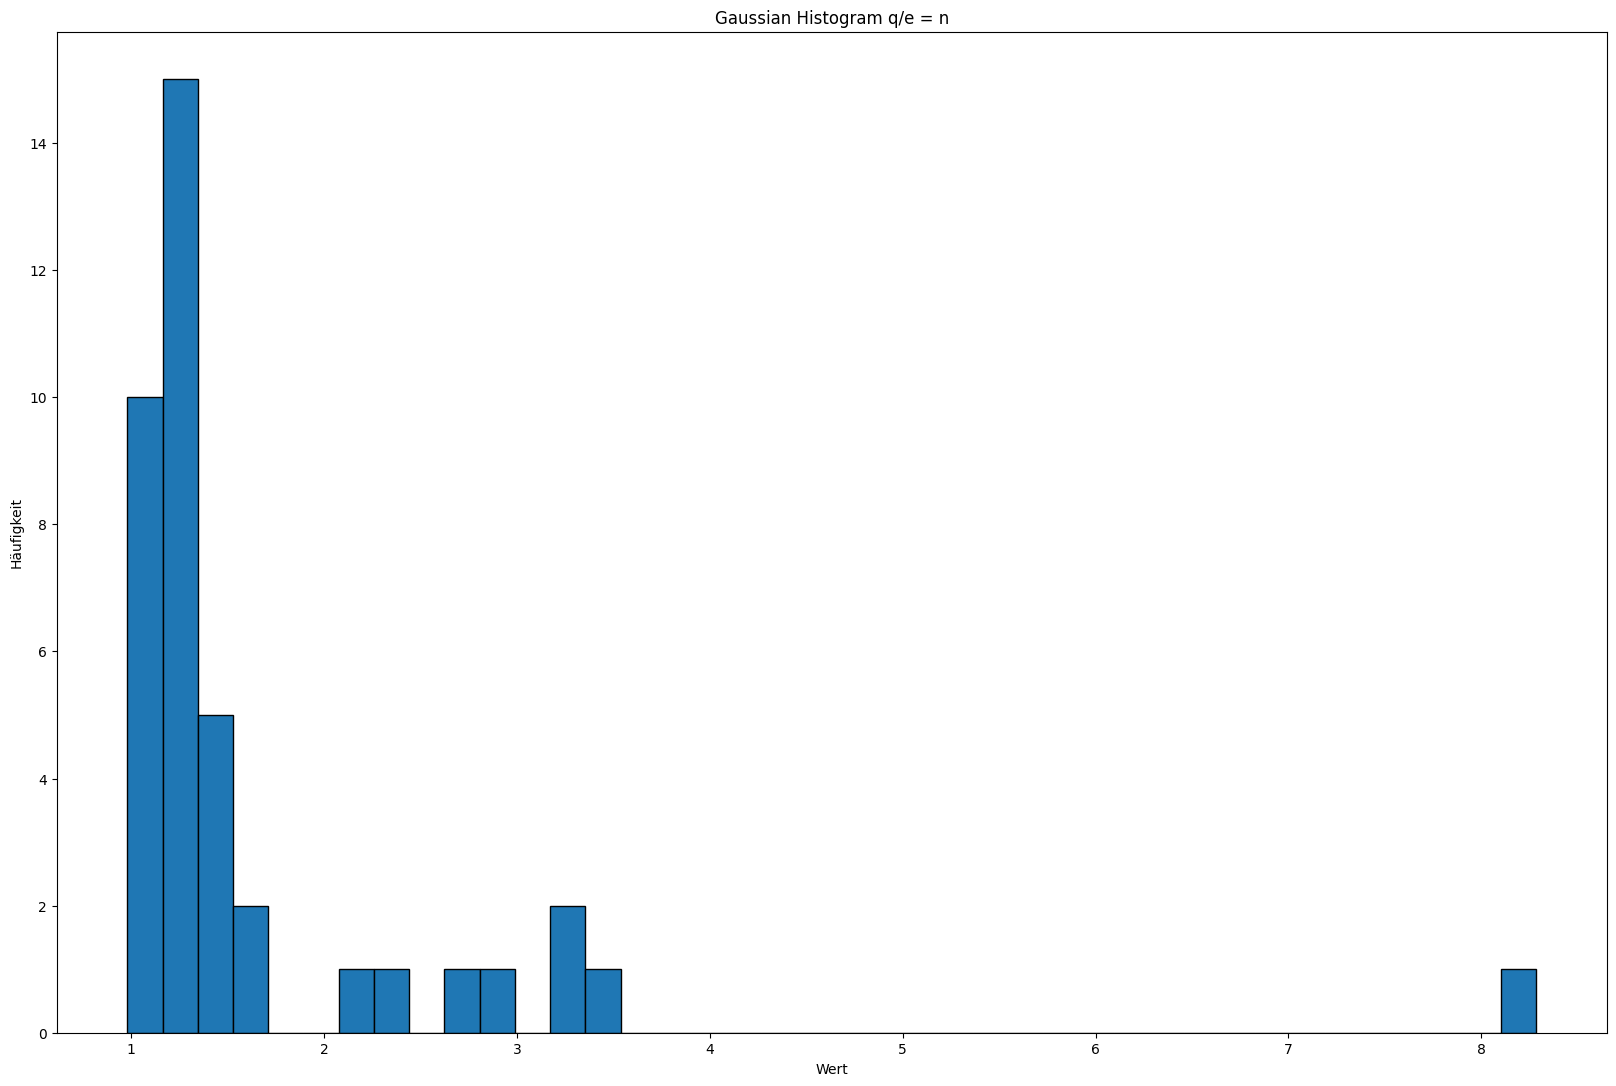

In [137]:
histogram_data = np.array([])

#bins =  bins=np.arange(min(histogram_data), max(histogram_data) + 0.1*10**(-19), 0.1*10**(-19))

#all Data
x = 0
y = 40

#Arik/Robin Data
#x = 0
#y = 40

#Anna/Sabi Data
#x = 41
#y = 80

#Finna/Nici Data
#x = 81
#y = 131

for i in range(x,y):
  histogram_data = np.append(histogram_data, c1[i,8].nominal_value)
plt.figure(figsize=(20,13))
plt.hist(histogram_data, bins = 40, edgecolor='black')
plt.title("Gaussian Histogram q/e = n")
plt.xlabel("Wert")
plt.ylabel("Häufigkeit")
plt.show()

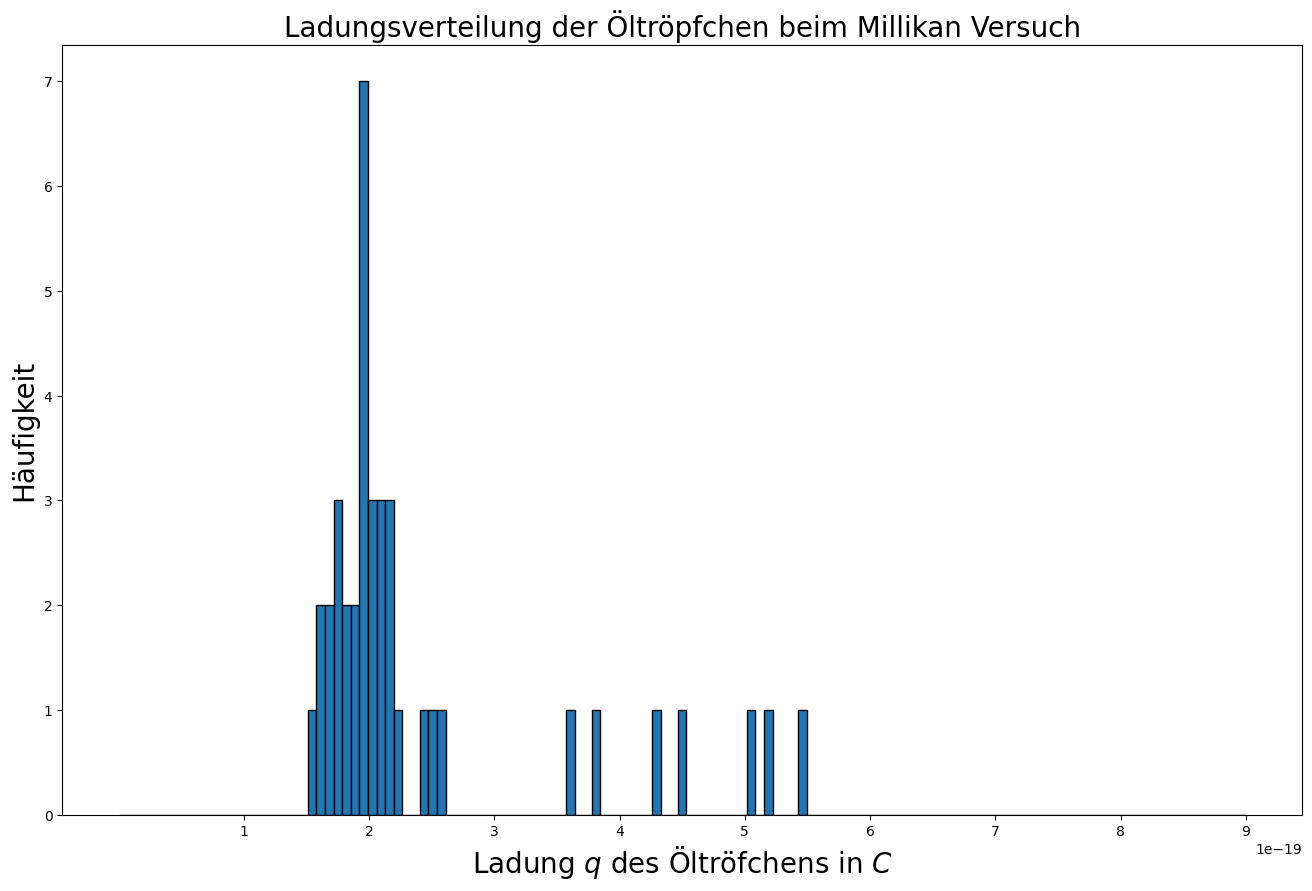

In [138]:
#Histogramm mit q
histogram_data = np.array([])
for i in range(x,y):
  histogram_data = np.append(histogram_data, c1[i,7].nominal_value)
plt.figure(figsize=(16,10))
plt.hist(histogram_data, bins = 131, edgecolor='black', range=[0, 9*10**(-19)], align='mid')
plt.xticks([1*10**(-19), 2*10**(-19), 3*10**(-19), 4*10**(-19), 5*10**(-19), 6*10**(-19), 7*10**(-19), 8*10**(-19), 9*10**(-19)])
plt.title("Ladungsverteilung der Öltröpfchen beim Millikan Versuch", fontsize = 20)
plt.xlabel(r"Ladung $q$ des Öltröfchens in $C$", fontsize = 20)
plt.ylabel("Häufigkeit", fontsize = 20)
plt.show()

In [139]:
#check mean
check_c1 = np.array([])
for i in range(x,y):
  if c1[i,8].nominal_value>0.5 and c1[i,8].nominal_value<1.5:
    check_c1 = np.append(check_c1, c1[i,8])

print(check_c1.mean())

1.198+/-0.035


In [140]:
#add x to array index 9
append_c1 = np.array([])
for i in range(len(c1)):
      append_c1 = np.append(append_c1, 1/(c1[i,6]*p))

c1 = np.concatenate((c1,append_c1[:,None]),axis=1)

#add y0 to array index 10
append_c1 = np.array([])
for i in range(len(c1)):
      append_c1 = np.append(append_c1, (c1[i,7])**(2/3))

c1 = np.concatenate((c1,append_c1[:,None]),axis=1)


In [141]:
#Standardabweichung n 1 peak
stvdev_q = np.array([])
for i in range(len(c1)):
  if c1[i,8].nominal_value>0.8 and c1[i,8].nominal_value<1.8:
    stvdev_q = np.append(stvdev_q, c1[i,8].nominal_value)
mean = np.mean(stvdev_q)
stddev = np.std(stvdev_q)

#Standardabweichung q erster peak
stvdev_q = np.array([])
for i in range(len(c1)):
  if c1[i,7].nominal_value>1.3*10**(-19) and c1[i,7].nominal_value<2.5*10**(-19):
    stvdev_q = np.append(stvdev_q, c1[i,7].nominal_value)
mean = np.mean(stvdev_q)
stddev = np.std(stvdev_q)
ug = mean - stddev
og = mean + stddev
peak1 = ufloat(mean, stddev)
print('mean erster peak=', mean)
print('standardabweichung erster peak=', stddev)

#Standardabweichung q zweiter peak
stvdev_q = np.array([])
for i in range(len(c1)):
  if c1[i,7].nominal_value>3.2*10**(-19) and c1[i,7].nominal_value<4.3*10**(-19):
    stvdev_q = np.append(stvdev_q, c1[i,7].nominal_value)
mean2 = np.mean(stvdev_q)
stddev2 = np.std(stvdev_q)
peak2 = ufloat(mean2, stddev2)
print('mean zweiter peak=', mean2)
print('standardabweichung zweiter peak=', stddev2)

e = peak1
print('unsere ganz eigene Elementarladung=', e)




mean erster peak= 1.9331075297786902e-19
standardabweichung erster peak= 2.0150506209644232e-20
mean zweiter peak= 3.686724812720896e-19
standardabweichung zweiter peak= 1.0443940919436191e-20
unsere ganz eigene Elementarladung= (1.93+/-0.20)e-19


-1.4977729637717137e-20
3.6333083161942965e-13




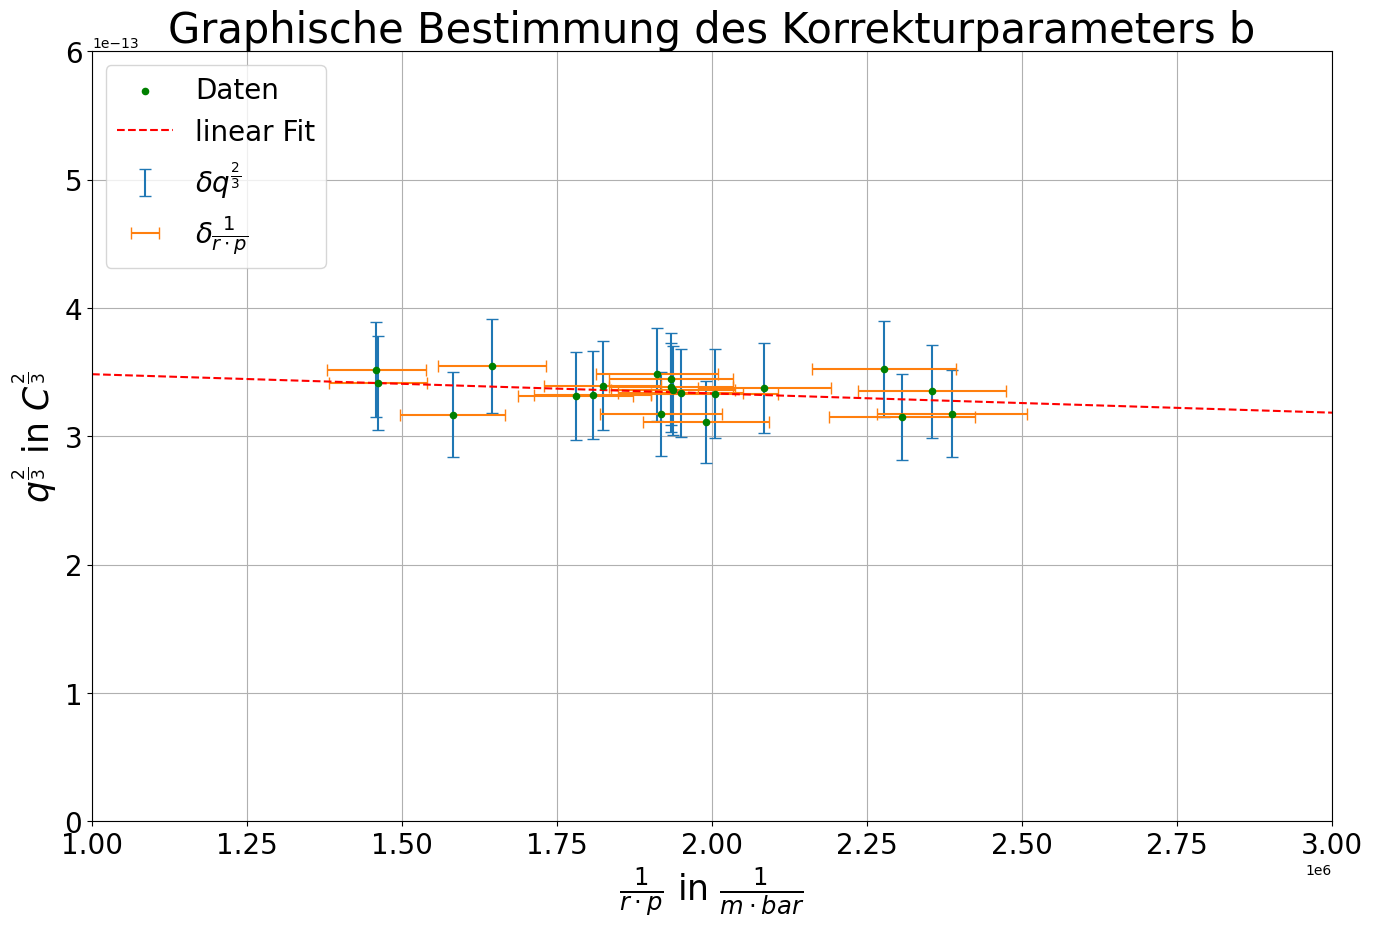

In [142]:
x_array_value = np.array([])
for i in range(x,y):
  if c1[i,7].nominal_value>ug and c1[i,7].nominal_value<og:
    x_array_value = np.append(x_array_value, c1[i,9].nominal_value)

y0_array_value = np.array([])
for i in range(x,y):
  if c1[i,7].nominal_value>ug and c1[i,7].nominal_value<og:
    y0_array_value = np.append(y0_array_value, c1[i,10].nominal_value)

x_array_error = np.array([])
for i in range(x,y):
  if c1[i,7].nominal_value>ug and c1[i,7].nominal_value<og:
    x_array_error = np.append(x_array_error, c1[i,9].std_dev)

y0_array_error = np.array([])
for i in range(x,y):
  if c1[i,7].nominal_value>ug and c1[i,7].nominal_value<og:
    y0_array_error = np.append(y0_array_error, c1[i,10].std_dev)

def linF(x, a,b):
    return a*x + b

fig, axs = plt.subplots(1,1,figsize=(16, 10));
plt.scatter(x_array_value, y0_array_value, label = 'Daten', color='green', s=20, zorder= 5)
axs.errorbar(x_array_value,y0_array_value,yerr = y0_array_error,linestyle='none',capsize = 4, label = r'$δq^{\frac{2}{3}}$');
axs.errorbar(x_array_value,y0_array_value,xerr = x_array_error,linestyle='none',capsize = 4, label = r'$δ\frac{1}{r \cdot p}$');
sc.optimize.curve_fit(linF, x_array_value, y0_array_value, absolute_sigma=True)
popt, pcov = sc.optimize.curve_fit(linF, x_array_value, y0_array_value)
a, b = popt
x_line = arange(0, 4000000 + 1)
y_line = linF(x_line, a, b)
perr = np.diag(pcov)
a1 = ufloat(a, perr[0])
b1 = ufloat(b, perr[1])
plt.plot(x_line, y_line, '--', color='red', label = 'linear Fit')

b1 = b
print(a)
print(b)
print('\n')


axs.set_xlabel(r'$\frac{1}{r \cdot p}$ in $\frac{1}{m \cdot bar}$', fontsize = 25);
axs.set_ylabel(r'$q^{\frac{2}{3}}$ in $C^{\frac{2}{3}}$', fontsize = 25);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

axs.legend(loc = 'upper left',fontsize=20)

plt.title(r'Graphische Bestimmung des Korrekturparameters b', fontsize = 30)
plt.grid()

plt.axis([1000000, 3000000, 0, 0.6*10**(-12)]) #Achsenanpassung
plt.show()

mean zweiter peak= 1.9331075297786902e-19
standardabweichung zweiter peak= 2.0150506209644232e-20
-1.4977729637717137e-20
3.6333083161942965e-13




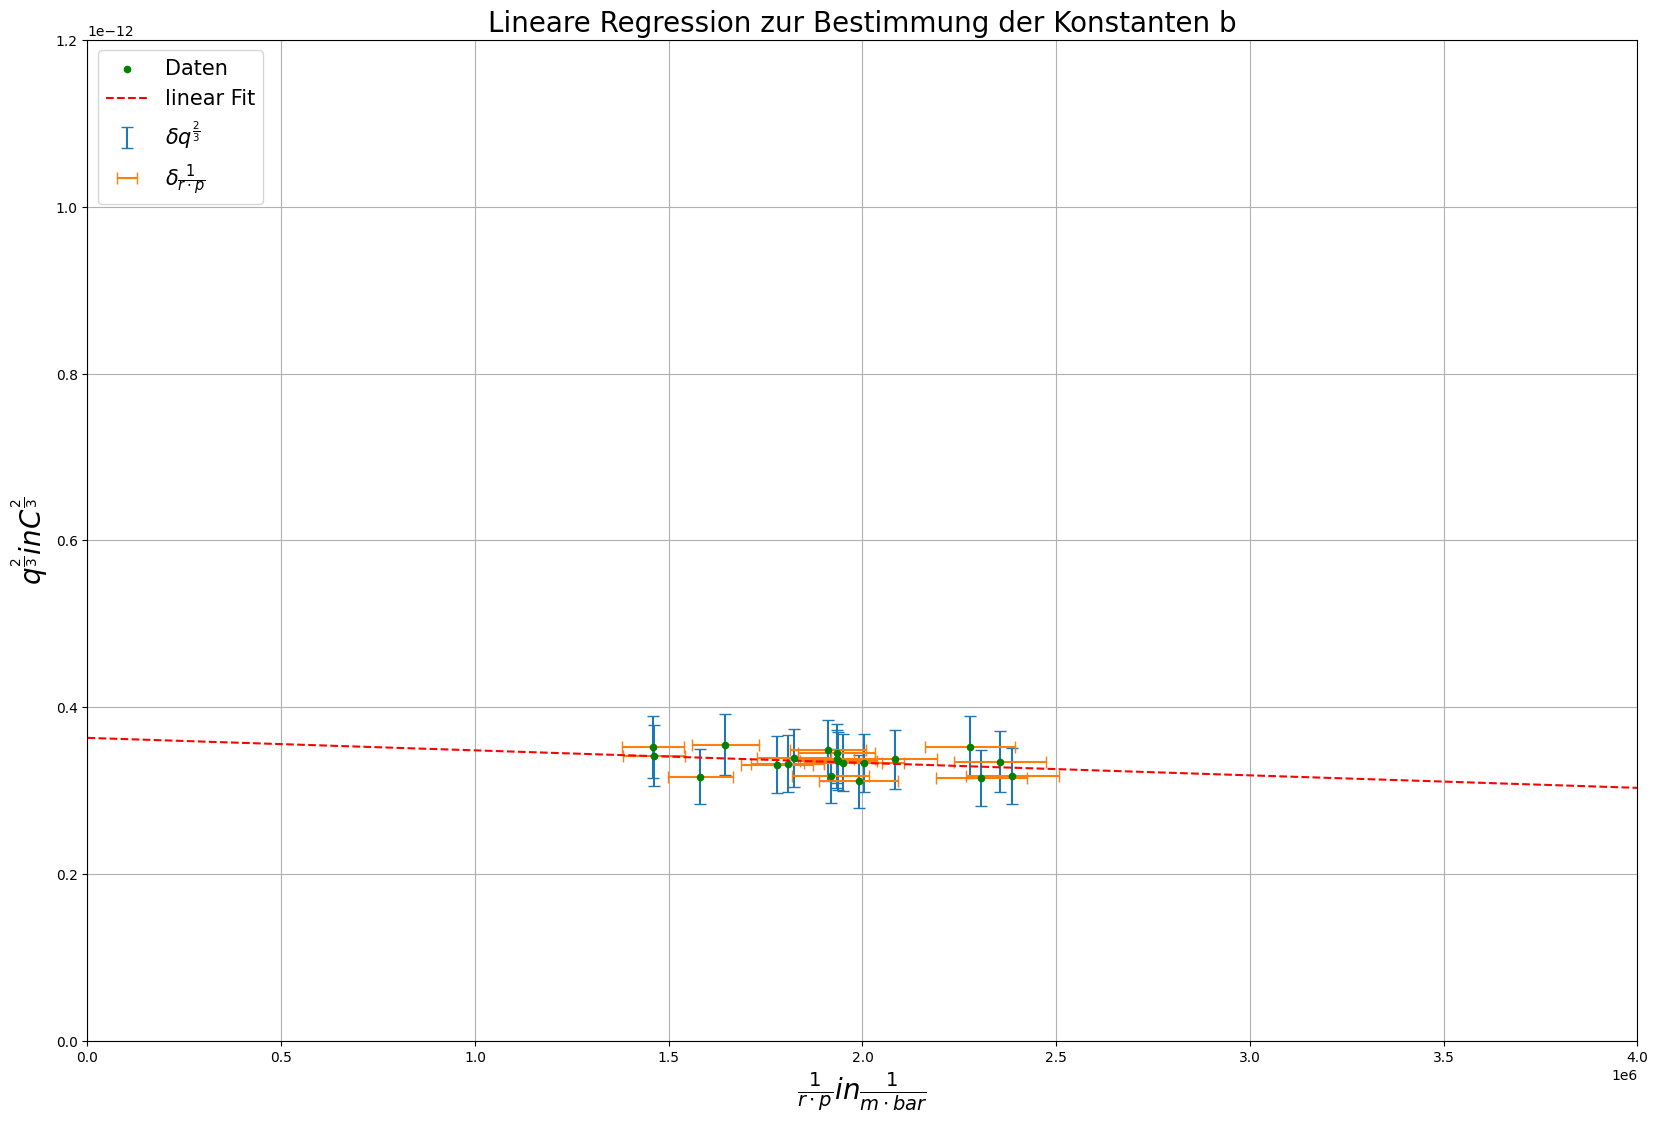

In [143]:

#Standardabweichung q zweiter peak
stvdev_q = np.array([])
for i in range(len(c1)):
  if c1[i,7].nominal_value>1.3*10**(-19) and c1[i,7].nominal_value<2.5*10**(-19):
    stvdev_q = np.append(stvdev_q, c1[i,7].nominal_value)
mean2 = np.mean(stvdev_q)
stddev2 = np.std(stvdev_q)
peak2 = ufloat(mean2, stddev2)
ug = mean2 - stddev2
og = mean2 + stddev2
print('mean zweiter peak=', mean2)
print('standardabweichung zweiter peak=', stddev2)

x_array_value = np.array([])
for i in range(x,y):
  if c1[i,7].nominal_value>ug and c1[i,7].nominal_value<og:
    x_array_value = np.append(x_array_value, c1[i,9].nominal_value)

y0_array_value = np.array([])
for i in range(x,y):
  if c1[i,7].nominal_value>ug and c1[i,7].nominal_value<og:
    y0_array_value = np.append(y0_array_value, c1[i,10].nominal_value)

x_array_error = np.array([])
for i in range(x,y):
  if c1[i,7].nominal_value>ug and c1[i,7].nominal_value<og:
    x_array_error = np.append(x_array_error, c1[i,9].std_dev)

y0_array_error = np.array([])
for i in range(x,y):
  if c1[i,7].nominal_value>ug and c1[i,7].nominal_value<og:
    y0_array_error = np.append(y0_array_error, c1[i,10].std_dev)

def linF(x, a,b):
    return a*x + b

fig, axs = plt.subplots(1,1,figsize=(20, 13));
plt.scatter(x_array_value, y0_array_value, label = 'Daten', color='green', s=20, zorder= 5)
axs.errorbar(x_array_value,y0_array_value,yerr = y0_array_error,linestyle='none',capsize = 4, label = r'$δq^{\frac{2}{3}}$');
axs.errorbar(x_array_value,y0_array_value,xerr = x_array_error,linestyle='none',capsize = 4, label = r'$δ\frac{1}{r \cdot p}$');
sc.optimize.curve_fit(linF, x_array_value, y0_array_value, absolute_sigma=True)
popt, pcov = sc.optimize.curve_fit(linF, x_array_value, y0_array_value)
a, b = popt
x_line = arange(0, 4000000 + 1)
y_line = linF(x_line, a, b)
perr = np.diag(pcov)
plt.plot(x_line, y_line, '--', color='red', label = 'linear Fit')

print(a)
print(b)
print('\n')


axs.set_xlabel(r'$\frac{1}{r \cdot p} in \frac{1}{m \cdot bar}$', fontsize = 20);
axs.set_ylabel(r'$q^{\frac{2}{3}} in C^{\frac{2}{3}}$', fontsize = 20);

axs.legend(loc = 'upper left',fontsize=15)

plt.title(r'Lineare Regression zur Bestimmung der Konstanten b', fontsize = 20)
plt.grid()

plt.axis([0, 4000000, 0, 1.2*10**(-12)]) #Achsenanpassung
plt.show()

In [144]:
b2 = b

print(b2)
print(b1)
print(b1**(3/2))
print(b2**(3/2))
ek= b2**(3/2) - b1**(3/2)
print(ek)

3.6333083161942965e-13
3.6333083161942965e-13
2.190046718263392e-19
2.190046718263392e-19
0.0
